In [76]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

In [2]:
df = pd.read_csv('cardekho.csv')

In [3]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.2,5.0


In [4]:
df.shape

(8128, 12)

In [5]:
df.describe()

,year,selling_price,km_driven,mileage(km/ltr/kg),engine,seats
count,8128.000000,8.128000e+03,8.128000e+03,7907.000000,7907.000000,7907.000000
mean,2013.804011,6.382718e+05,6.981951e+04,19.418783,1458.625016,5.416719
std,4.044249,8.062534e+05,5.655055e+04,4.037145,503.916303,0.959588
min,1983.000000,2.999900e+04,1.000000e+00,0.000000,624.000000,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,16.780000,1197.000000,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,19.300000,1248.000000,5.000000
75%,2017.000000,6.750000e+05,9.800000e+04,22.320000,1582.000000,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,42.000000,3604.000000,14.000000


In [6]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.2,5.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name                8128 non-null   object 
 1   year                8128 non-null   int64  
 2   selling_price       8128 non-null   int64  
 3   km_driven           8128 non-null   int64  
 4   fuel                8128 non-null   object 
 5   seller_type         8128 non-null   object 
 6   transmission        8128 non-null   object 
 7   owner               8128 non-null   object 
 8   mileage(km/ltr/kg)  7907 non-null   float64
 9   engine              7907 non-null   float64
 10  max_power           7913 non-null   object 
 11  seats               7907 non-null   float64
dtypes: float64(3), int64(3), object(6)
memory usage: 762.1+ KB


In [8]:
df.value_counts('fuel')

fuel
Diesel    4402
Petrol    3631
CNG         57
LPG         38
Name: count, dtype: int64

In [9]:
df.value_counts('seller_type')

seller_type
Individual          6766
Dealer              1126
Trustmark Dealer     236
Name: count, dtype: int64

In [10]:
df.value_counts('transmission')

transmission
Manual       7078
Automatic    1050
Name: count, dtype: int64

In [11]:
df.value_counts('owner')

owner
First Owner             5289
Second Owner            2105
Third Owner              555
Fourth & Above Owner     174
Test Drive Car             5
Name: count, dtype: int64

In [12]:
df.value_counts('seats')

seats
5.0     6254
7.0     1120
8.0      236
4.0      133
9.0       80
6.0       62
10.0      19
2.0        2
14.0       1
Name: count, dtype: int64

In [13]:
df.isna().sum()

name                    0
year                    0
selling_price           0
km_driven               0
fuel                    0
seller_type             0
transmission            0
owner                   0
mileage(km/ltr/kg)    221
engine                221
max_power             215
seats                 221
dtype: int64

In [14]:
df.dropna(inplace=True)

In [15]:
df.isnull().sum()

name                  0
year                  0
selling_price         0
km_driven             0
fuel                  0
seller_type           0
transmission          0
owner                 0
mileage(km/ltr/kg)    0
engine                0
max_power             0
seats                 0
dtype: int64

In [16]:
df.duplicated().sum()

1189

In [17]:
df.drop_duplicates(inplace=True)

In [18]:
df['seats'] = df['seats'].astype('int')

In [19]:
df['engine'] = df['engine'].astype('int')

In [20]:
mp = [i for i in df['max_power']]

In [21]:
mp

['74',
 '103.52',
 '78',
 '90',
 '88.2',
 '81.86',
 '57.5',
 '37',
 '67.1',
 '68.1',
 '108.45',
 '60',
 '73.9',
 '67',
 '82',
 '88.5',
 '90',
 '46.3',
 '88.73',
 '64.1',
 '98.6',
 '74',
 '88.8',
 '83.81',
 '83.1',
 '47.3',
 '73.8',
 '67',
 '34.2',
 '88.5',
 '35',
 '81.83',
 '88.5',
 '40.3',
 '67.1',
 '121.3',
 '67',
 '138.03',
 '37',
 '160.77',
 '117.3',
 '116.3',
 '83.14',
 '88.5',
 '67.05',
 '168.5',
 '100',
 '120.7',
 '98.63',
 '175.56',
 '98.6',
 '103.25',
 '98.6',
 '171.5',
 '100.6',
 '174.33',
 '138.03',
 '187.74',
 '170',
 '88.8',
 '78.9',
 '88.76',
 '74',
 '86.8',
 '83.1',
 '108.495',
 '98.6',
 '67',
 '108.62',
 '88.5',
 '88.5',
 '78.9',
 '74',
 '168.5',
 '74',
 '93.7',
 '103.6',
 '100.6',
 '98.59',
 '189',
 '67.04',
 '67.05',
 '47.3',
 '47.3',
 '68.05',
 '35',
 '58.2',
 '74',
 '68.05',
 '103.6',
 '67.1',
 '82.85',
 '74',
 '82',
 '46.3',
 '88.73',
 '67.05',
 '90',
 '81.8',
 '73',
 '83.1',
 '120',
 '94.68',
 '121.3',
 '160',
 '65',
 '155',
 '69.01',
 '126.32',
 '88.76',
 '138.1'

In [24]:
mp.count(' ')

1

In [27]:
mp.index(' ')

4142

In [28]:
mp[4142] = None

In [29]:
mp.count(' ')

0

In [30]:
df['max_power'] = mp

In [31]:
df.isna().sum()

name                  0
year                  0
selling_price         0
km_driven             0
fuel                  0
seller_type           0
transmission          0
owner                 0
mileage(km/ltr/kg)    0
engine                0
max_power             1
seats                 0
dtype: int64

In [32]:
df.dropna(inplace=True)

In [33]:
df.isna().sum()

name                  0
year                  0
selling_price         0
km_driven             0
fuel                  0
seller_type           0
transmission          0
owner                 0
mileage(km/ltr/kg)    0
engine                0
max_power             0
seats                 0
dtype: int64

In [37]:
df['max_power'] = df['max_power'].astype('float')

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6717 entries, 0 to 8125
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name                6717 non-null   object 
 1   year                6717 non-null   int64  
 2   selling_price       6717 non-null   int64  
 3   km_driven           6717 non-null   int64  
 4   fuel                6717 non-null   object 
 5   seller_type         6717 non-null   object 
 6   transmission        6717 non-null   object 
 7   owner               6717 non-null   object 
 8   mileage(km/ltr/kg)  6717 non-null   float64
 9   engine              6717 non-null   int32  
 10  max_power           6717 non-null   float64
 11  seats               6717 non-null   int32  
dtypes: float64(2), int32(2), int64(3), object(5)
memory usage: 629.7+ KB


In [39]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248,74.00,5
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498,103.52,5
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497,78.00,5
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396,90.00,5
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298,88.20,5


In [40]:
df.shape

(6717, 12)

In [41]:
df.value_counts('name')

name
Maruti Swift Dzire VDI              118
Maruti Alto 800 LXI                  76
Maruti Alto LXi                      69
Maruti Swift VDI                     60
Maruti Alto K10 VXI                  47
                                   ... 
Mahindra Scorpio 2.6 SPORTZ CRDe      1
Mahindra Scorpio 2.6 CRDe SLE         1
Mahindra Scorpio 1.99 S8              1
Mahindra Scorpio 1.99 S4 Plus         1
Volvo XC90 T8 Excellence BSIV         1
Name: count, Length: 1982, dtype: int64

In [42]:
df.drop('name',axis=1,inplace=True)

In [43]:
df.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats
0,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248,74.00,5
1,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498,103.52,5
2,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497,78.00,5
3,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396,90.00,5
4,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298,88.20,5


In [44]:
len(df.value_counts('year'))

27

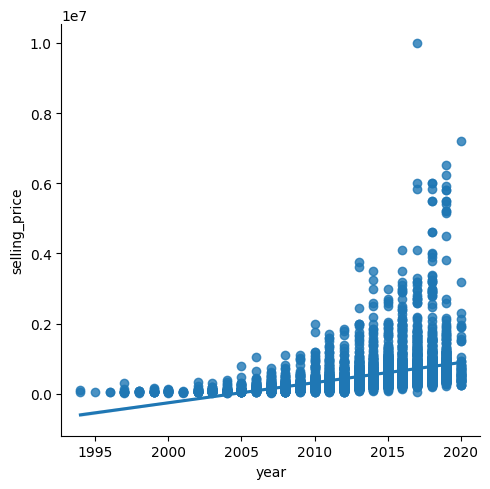

In [46]:
sns.lmplot(x='year',y='selling_price',data=df)
plt.show()

In [47]:
df.drop('year',axis=1,inplace=True)

In [48]:
df.head()

,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats
0,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248,74.00,5
1,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498,103.52,5
2,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497,78.00,5
3,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396,90.00,5
4,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298,88.20,5


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6717 entries, 0 to 8125
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   selling_price       6717 non-null   int64  
 1   km_driven           6717 non-null   int64  
 2   fuel                6717 non-null   object 
 3   seller_type         6717 non-null   object 
 4   transmission        6717 non-null   object 
 5   owner               6717 non-null   object 
 6   mileage(km/ltr/kg)  6717 non-null   float64
 7   engine              6717 non-null   int32  
 8   max_power           6717 non-null   float64
 9   seats               6717 non-null   int32  
dtypes: float64(2), int32(2), int64(2), object(4)
memory usage: 524.8+ KB


In [50]:
df['owner'].value_counts()

owner
First Owner             4176
Second Owner            1888
Third Owner              493
Fourth & Above Owner     155
Test Drive Car             5
Name: count, dtype: int64

In [51]:
ow = []
for i in df['owner']:
    if i == 'First Owner':
        ow.append(1)
    elif i == 'Second Owner':
        ow.append(2)
    elif i == 'Third Owner':
        ow.append(3)
    elif i == 'Fourth and Above Owner':
        ow.append(4)
    else:
        ow.append(0)
df['owner'] = ow

In [52]:
df.head()

,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats
0,450000,145500,Diesel,Individual,Manual,1,23.40,1248,74.00,5
1,370000,120000,Diesel,Individual,Manual,2,21.14,1498,103.52,5
2,158000,140000,Petrol,Individual,Manual,3,17.70,1497,78.00,5
3,225000,127000,Diesel,Individual,Manual,1,23.00,1396,90.00,5
4,130000,120000,Petrol,Individual,Manual,1,16.10,1298,88.20,5


In [53]:
df['fuel'].value_counts()

fuel
Diesel    3658
Petrol    2973
CNG         51
LPG         35
Name: count, dtype: int64

In [55]:
fuel = []
for i in df['fuel']:
    if i == 'Diesel':
        fuel.append(1)
    elif i == 'Petrol':
        fuel.append(2)
    elif i == 'CNG':
        fuel.append(3)
    else:
        fuel.append(4)
df['fuel'] = fuel

In [56]:
df.head()

,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats
0,450000,145500,1,Individual,Manual,1,23.40,1248,74.00,5
1,370000,120000,1,Individual,Manual,2,21.14,1498,103.52,5
2,158000,140000,2,Individual,Manual,3,17.70,1497,78.00,5
3,225000,127000,1,Individual,Manual,1,23.00,1396,90.00,5
4,130000,120000,2,Individual,Manual,1,16.10,1298,88.20,5


In [57]:
df.value_counts('seller_type')

seller_type
Individual          6024
Dealer               666
Trustmark Dealer      27
Name: count, dtype: int64

In [58]:
st = []
for i in df['seller_type']:
    if i == 'Individual':
        st.append(1)
    elif i == 'Dealer':
        st.append(2)
    else:
        st.append(3)
df['seller_type'] = st

In [59]:
df.head()

,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats
0,450000,145500,1,1,Manual,1,23.40,1248,74.00,5
1,370000,120000,1,1,Manual,2,21.14,1498,103.52,5
2,158000,140000,2,1,Manual,3,17.70,1497,78.00,5
3,225000,127000,1,1,Manual,1,23.00,1396,90.00,5
4,130000,120000,2,1,Manual,1,16.10,1298,88.20,5


In [60]:
df.value_counts('transmission')

transmission
Manual       6142
Automatic     575
Name: count, dtype: int64

In [61]:
tm = []
for i in df['transmission']:
    if i == 'Manual':
        tm.append(1)
    else:
        tm.append(2)
df['transmission'] = tm

In [62]:
df.head()

,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats
0,450000,145500,1,1,1,1,23.40,1248,74.00,5
1,370000,120000,1,1,1,2,21.14,1498,103.52,5
2,158000,140000,2,1,1,3,17.70,1497,78.00,5
3,225000,127000,1,1,1,1,23.00,1396,90.00,5
4,130000,120000,2,1,1,1,16.10,1298,88.20,5


In [63]:
df.shape

(6717, 10)

In [65]:
df.describe()

,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats
count,6.717000e+03,6.717000e+03,6717.000000,6717.000000,6717.000000,6717.000000,6717.000000,6717.000000,6717.000000,6717.000000
mean,5.263860e+05,7.339834e+04,1.473426,1.107191,1.085604,1.404049,19.466585,1430.985857,87.766100,5.434271
std,5.235504e+05,5.870328e+04,0.543863,0.322111,0.279799,0.659765,4.048102,493.469198,31.724555,0.983805
min,2.999900e+04,1.000000e+00,1.000000,1.000000,1.000000,0.000000,0.000000,624.000000,32.800000,2.000000
25%,2.500000e+05,3.800000e+04,1.000000,1.000000,1.000000,1.000000,16.800000,1197.000000,67.100000,5.000000
50%,4.200000e+05,6.820300e+04,1.000000,1.000000,1.000000,1.000000,19.440000,1248.000000,81.830000,5.000000
75%,6.500000e+05,1.000000e+05,2.000000,1.000000,1.000000,2.000000,22.500000,1498.000000,100.000000,5.000000
max,1.000000e+07,2.360457e+06,4.000000,3.000000,2.000000,3.000000,42.000000,3604.000000,400.000000,14.000000


In [66]:
df.corr()

,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats
selling_price,1.000000,-0.161265,-0.249739,0.250423,0.465538,-0.197097,-0.108655,0.442772,0.692323,0.158531
km_driven,-0.161265,1.000000,-0.252409,-0.126336,-0.118965,0.211162,-0.196419,0.253460,0.041770,0.207890
fuel,-0.249739,-0.252409,1.000000,-0.017735,0.006634,-0.020282,-0.055126,-0.517135,-0.330331,-0.347017
seller_type,0.250423,-0.126336,-0.017735,1.000000,0.213725,-0.138667,0.001552,0.065629,0.187339,-0.040726
transmission,0.465538,-0.118965,0.006634,0.213725,1.000000,-0.073665,-0.173667,0.219526,0.441681,-0.019314
owner,-0.197097,0.211162,-0.020282,-0.138667,-0.073665,1.000000,-0.132313,0.031322,-0.046731,0.003989
mileage(km/ltr/kg),-0.108655,-0.196419,-0.055126,0.001552,-0.173667,-0.132313,1.000000,-0.579153,-0.378609,-0.459188
engine,0.442772,0.253460,-0.517135,0.065629,0.219526,0.031322,-0.579153,1.000000,0.683506,0.658711
max_power,0.692323,0.041770,-0.330331,0.187339,0.441681,-0.046731,-0.378609,0.683506,1.000000,0.259028
seats,0.158531,0.207890,-0.347017,-0.040726,-0.019314,0.003989,-0.459188,0.658711,0.259028,1.000000


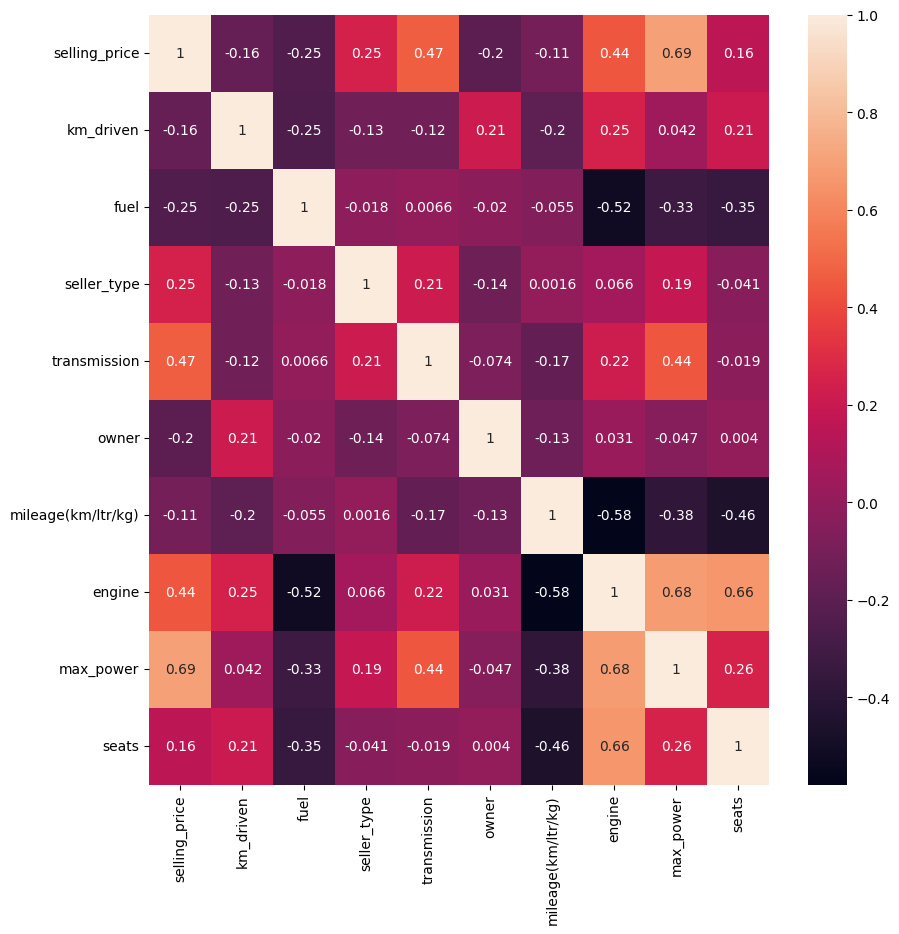

In [68]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)
plt.show()

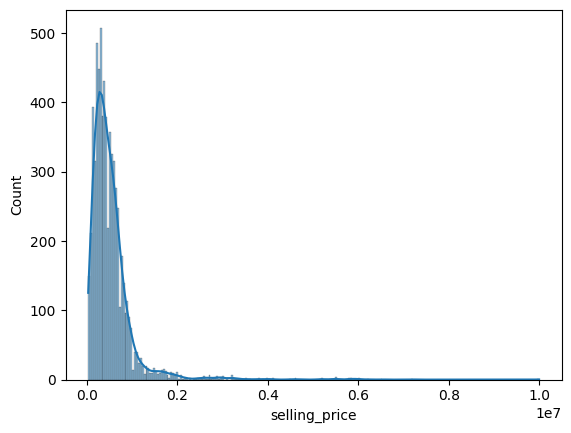

In [71]:
sns.histplot(df['selling_price'],kde=True)
plt.show()

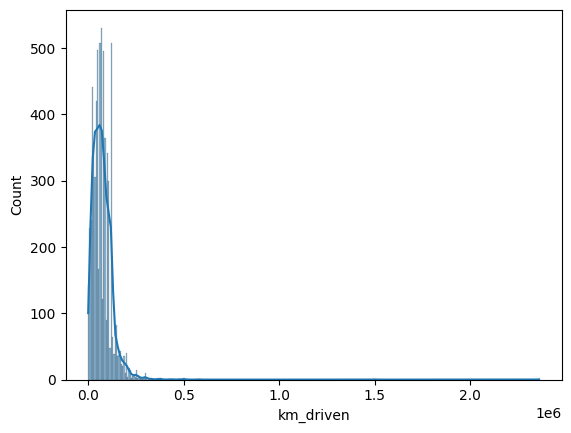

In [72]:
sns.histplot(df['km_driven'],kde=True)
plt.show()

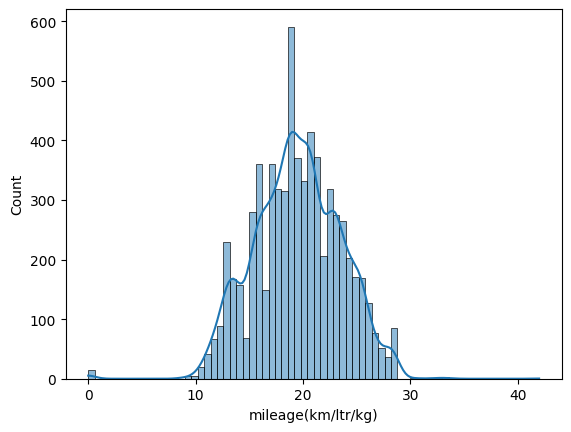

In [73]:
sns.histplot(df['mileage(km/ltr/kg)'],kde=True)
plt.show()

In [75]:
df.columns

Index(['selling_price', 'km_driven', 'fuel', 'seller_type', 'transmission',
       'owner', 'mileage(km/ltr/kg)', 'engine', 'max_power', 'seats'],
      dtype='object')

In [77]:
x = df[['km_driven', 'fuel', 'seller_type', 'transmission',
       'owner', 'mileage(km/ltr/kg)', 'engine', 'max_power', 'seats']]
y = df[['selling_price']]

In [78]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [79]:
lr = LinearRegression()

In [80]:
dtr = DecisionTreeRegressor()

In [81]:
lr.fit(x_train,y_train)

LinearRegression()

In [82]:
dtr.fit(x_train,y_train)

DecisionTreeRegressor()

In [83]:
y_pred_lr = lr.predict(x_test)

In [84]:
y_pred_dtr = dtr.predict(x_test)

In [89]:
r2_score(y_test,y_pred_lr)*100

57.723854759161874

In [90]:
r2_score(y_test,y_pred_dtr)*100

73.49549986076691

In [93]:
dic = {'Model':['Linear Regression','Decision Tree Regressor'],
      'Accuracy': [f'{int(r2_score(y_test,y_pred_lr)*100)} %',f'{int(r2_score(y_test,y_pred_dtr)*100)} %']}

In [94]:
accuracy_matrix = pd.DataFrame(dic)

In [95]:
accuracy_matrix

,Model,Accuracy
0,Linear Regression,57 %
1,Decision Tree Regressor,73 %
